In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report





In [9]:
train=pd.read_csv('C:\\Users\SHREENATH S HEBBAR\\Documents\\python\Machine Learning\\Projects\\human activity recognition\\train.csv')
test=pd.read_csv('C:\\Users\SHREENATH S HEBBAR\\Documents\\python\\Machine Learning\\Projects\\human activity recognition\\test.csv')

In [10]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [12]:
train.info

<bound method DataFrame.info of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245     

In [15]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [20]:
print('the train duplictaed',sum(train.duplicated()))
print('the test duplictaed',sum(test.duplicated()))

the train duplictaed 0
the test duplictaed 0


In [24]:
train.isna().values.sum()

0

In [27]:
type(train.Activity)

pandas.core.series.Series

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'LAYING'),
  Text(1, 0, 'STANDING'),
  Text(2, 0, 'SITTING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_UPSTAIRS'),
  Text(5, 0, 'WALKING_DOWNSTAIRS')])

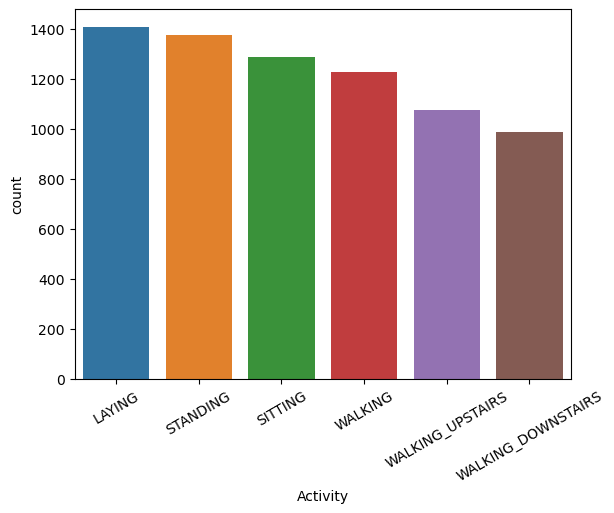

In [34]:
sns.countplot(x=train.Activity,order=train.Activity.value_counts().index)
plt.xticks(rotation=30)

In [46]:
Counter([ col.split('-')[0].split('()')[0] for col in train.columns ])

Counter({'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle(tBodyAccMean,gravity)': 1,
         'angle(tBodyAccJerkMean),gravityMean)': 1,
         'angle(tBodyGyroMean,gravityMean)': 1,
         'angle(tBodyGyroJerkMean,gravityMean)': 1,
         'angle(X,gravityMean)': 1,
         'angle(Y,gravityMean)': 1,
         'angle(Z,gravityMean)': 1,
         'subject': 1,
         'Activity': 1})

In [54]:
pd.DataFrame.from_dict(Counter([ col.split('-')[0].split('()')[0] for col in train.columns ]),orient='index').rename(columns={0:'Count'}).sort_values('Count',ascending=False)

,Count
fBodyAccJerk,79
fBodyGyro,79
fBodyAcc,79
tBodyAcc,40
tBodyAccJerk,40
tBodyGyro,40
tBodyGyroJerk,40
tGravityAcc,40
fBodyBodyGyroJerkMag,13
fBodyBodyGyroMag,13


Text(0.1, 9, 'Dynamic Activities')

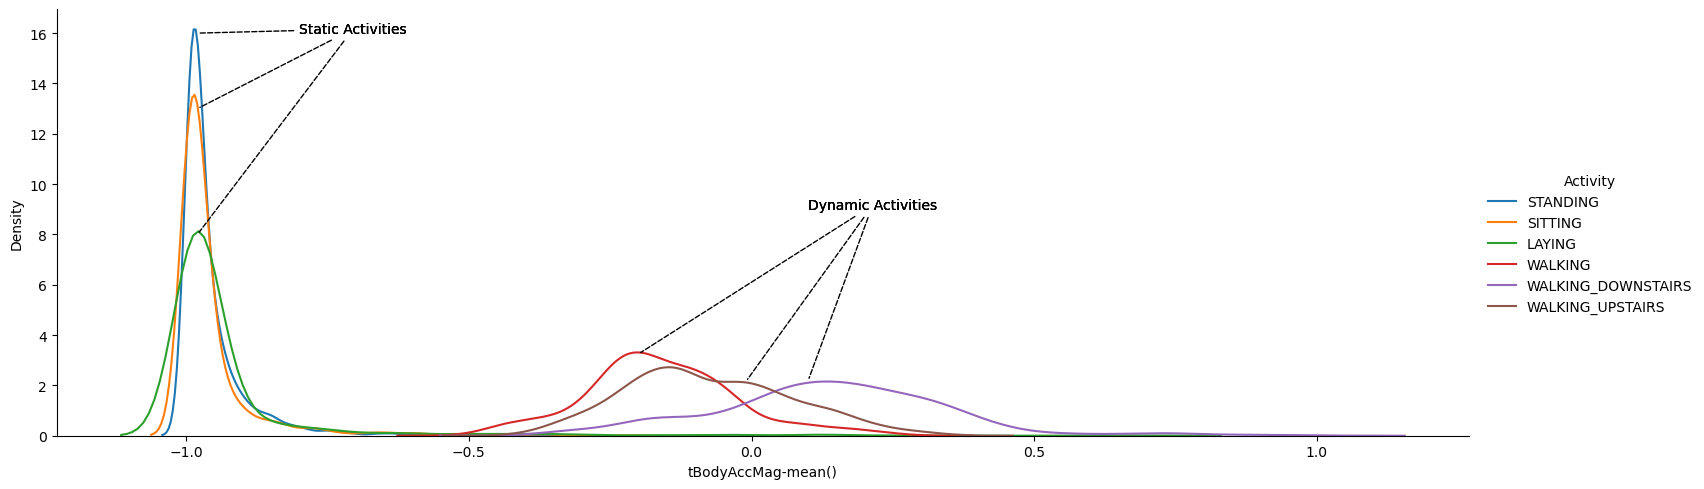

In [64]:
facetgrid=sns.FacetGrid(train,hue='Activity',height=5,aspect=3)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()',hist=False).add_legend()
plt.annotate("Static Activities", xy = (-.98, 8), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 13), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 16), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

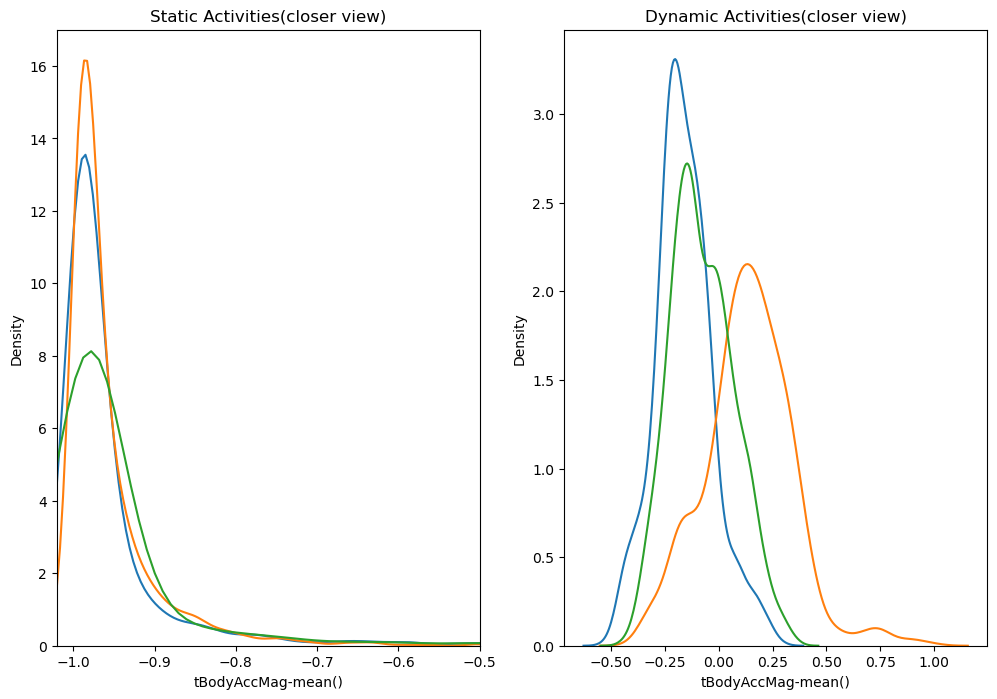

In [65]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 17])

plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')
plt.show()

<Axes: xlabel='Activity', ylabel='tBodyAccMag-mean()'>

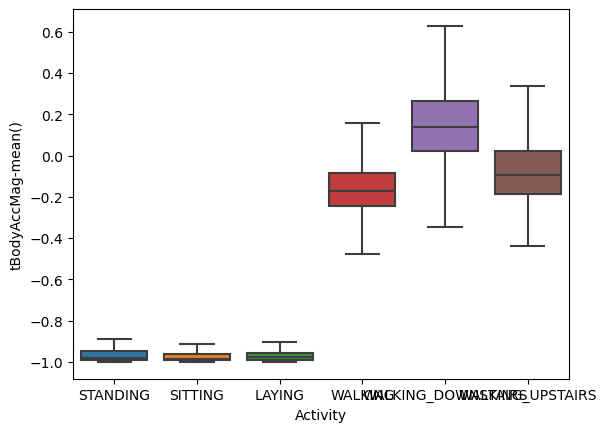

In [68]:
sns.boxplot(x="Activity",y="tBodyAccMag-mean()",data=train,showfliers=False)


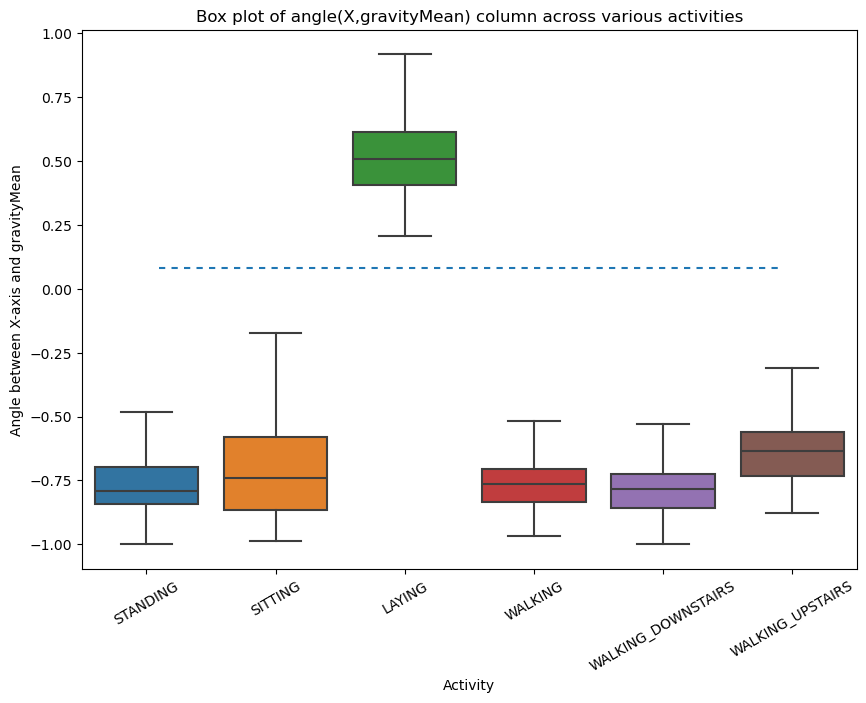

In [69]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.show()

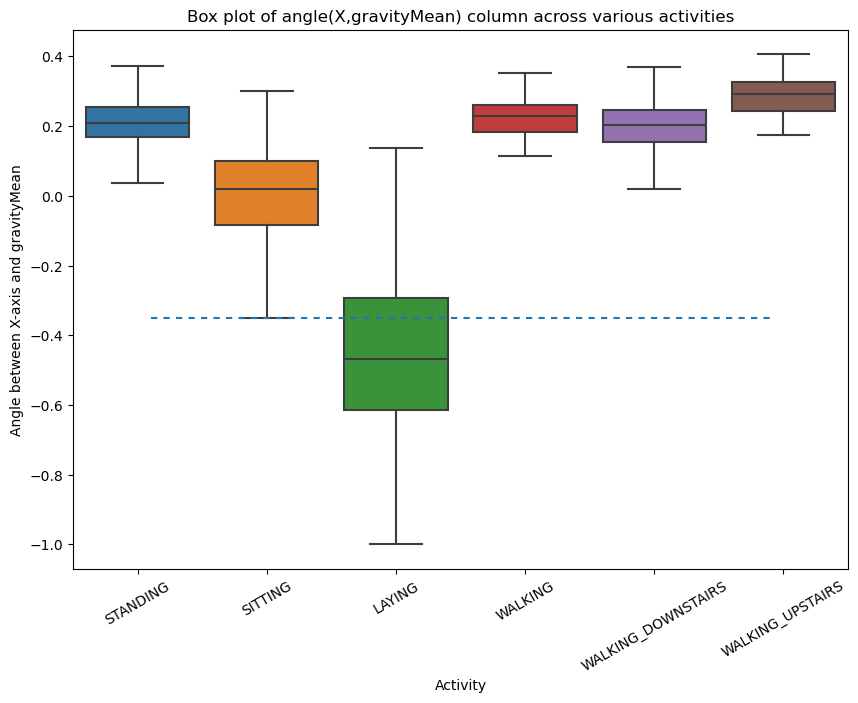

In [71]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data=train, showfliers=False)
plt.axhline(y=-0.35, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.show()

In [74]:
x=train.drop(['subject','Activity'],axis=1)
pca=PCA(n_components=2,random_state=0).fit_transform(x)

In [75]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

<Axes: >

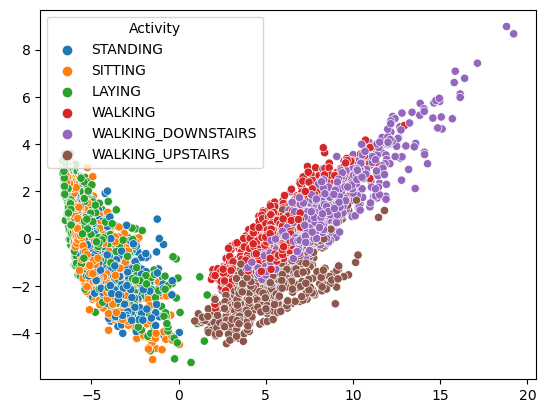

In [78]:
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=train["Activity"])

In [80]:
tsne=TSNE(n_components=2,random_state=0,n_iter=1000).fit_transform(x)


<Axes: >

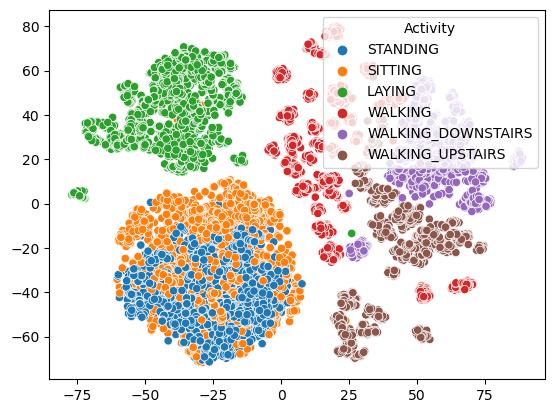

In [85]:
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue=train["Activity"])

In [86]:
y=train["Activity"]
xtest=test.drop(['subject','Activity'],axis=1)
ytest=test["Activity"]

In [89]:
xtest.shape,x.shape

((999, 561), (7352, 561))

In [91]:
parameters={'max_iter':[100,200,500]}
lrc=LogisticRegression()
lrc1=RandomizedSearchCV(lrc,param_distributions=parameters,cv=5,random_state=0)
lrc1.fit(x,y)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [100, 200, 500]},
                   random_state=0)

In [96]:
lrc1.best_params_

{'max_iter': 500}

In [92]:
predict=lrc1.predict(xtest)

6

In [95]:
accu=accuracy_score(ytest,predict)
accu

0.954954954954955

In [98]:
def plot_confusion_matrix(cm,labels):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels, yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [100]:
cm = confusion_matrix(ytest.values,predict)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 147,  20,   0,   0,   3],
       [  0,   8, 169,   1,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

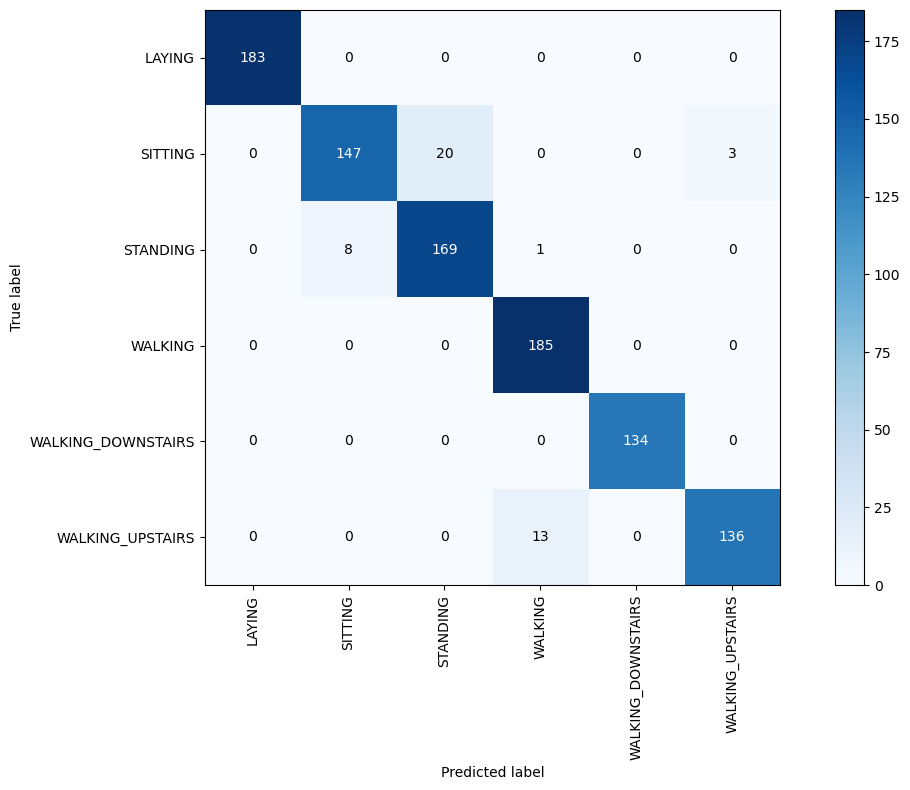

In [101]:
plot_confusion_matrix(cm, np.unique(predict))

In [109]:
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)

In [111]:
get_best_randomsearch_results(lrc1)

Best estimator :  LogisticRegression(max_iter=500)
Best set of parameters :  {'max_iter': 500}


In [115]:
parameters={'kernel':['linear','rbf','poly','sigmoid'],'C':[100,50]}
svm1=RandomizedSearchCV(SVC(), param_distributions=parameters, cv = 3, random_state=42)
svm1.fit(x,y)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [117]:
predict1=svm1.predict(xtest)

In [120]:
acc2=accuracy_score(ytest,predict1)
print("Accuracy score is",acc2)

Accuracy score is 0.965965965965966


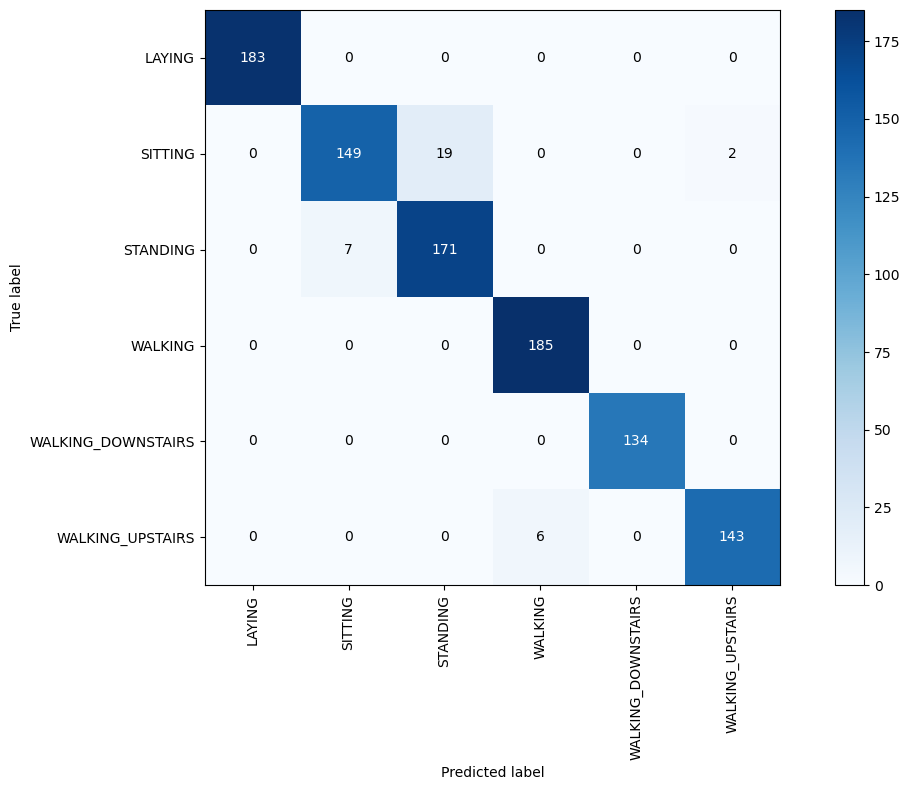

In [119]:
cm = confusion_matrix(ytest.values,predict1)
plot_confusion_matrix(cm, np.unique(predict1))

In [121]:

get_best_randomsearch_results(svm1)

Best estimator :  SVC(C=50)
Best set of parameters :  {'kernel': 'rbf', 'C': 50}


In [122]:
parameters={'max_depth':np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters, random_state = 42)
dt_classifier_rs.fit(x, y)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [123]:
y_pred = dt_classifier_rs.predict(xtest)
dt_accuracy = accuracy_score(ytest,y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)



Accuracy using Decision tree :  0.8438438438438438


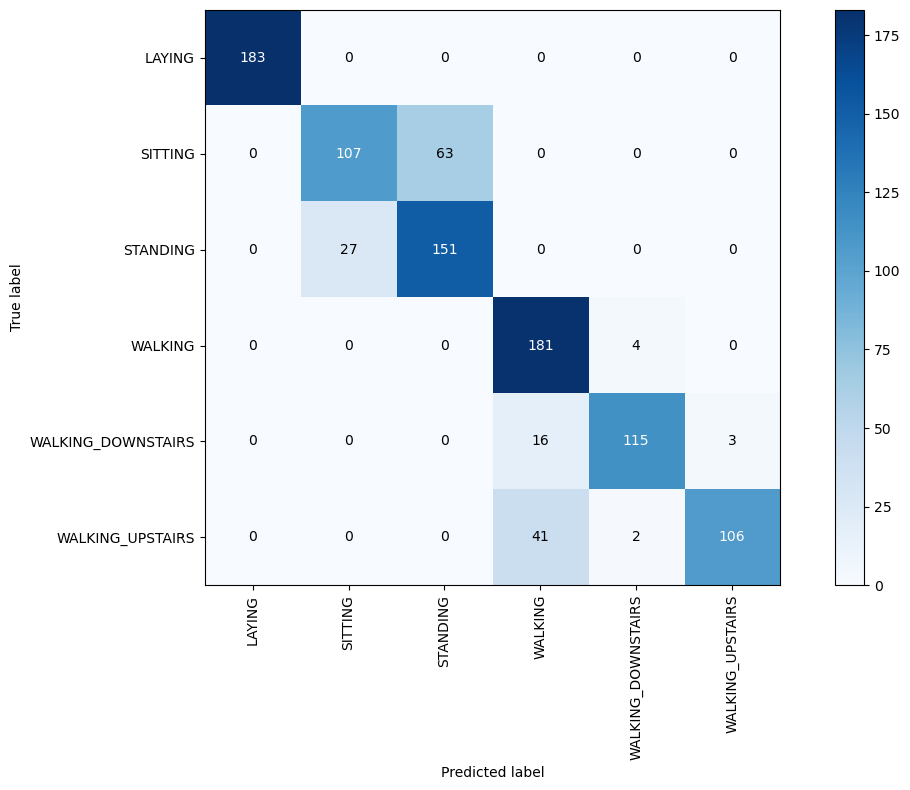

In [126]:
cm = confusion_matrix(ytest.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) 

In [125]:

get_best_randomsearch_results(dt_classifier_rs)

Best estimator :  DecisionTreeClassifier(max_depth=8)
Best set of parameters :  {'max_depth': 8}


In [127]:
parameters = {
    'n_estimators':np.arange(20, 101, 10), 
    'max_depth': np.arange(2, 17, 2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=parameters,random_state = 42)
rf_classifier_rs.fit(x, y)


RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [128]:
get_best_randomsearch_results(rf_classifier_rs)

Best estimator :  RandomForestClassifier(max_depth=14)
Best set of parameters :  {'n_estimators': 100, 'max_depth': 14}


In [129]:
y_pred = rf_classifier_rs.predict(xtest)
rf_accuracy = accuracy_score(y_true=ytest, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.9159159159159159


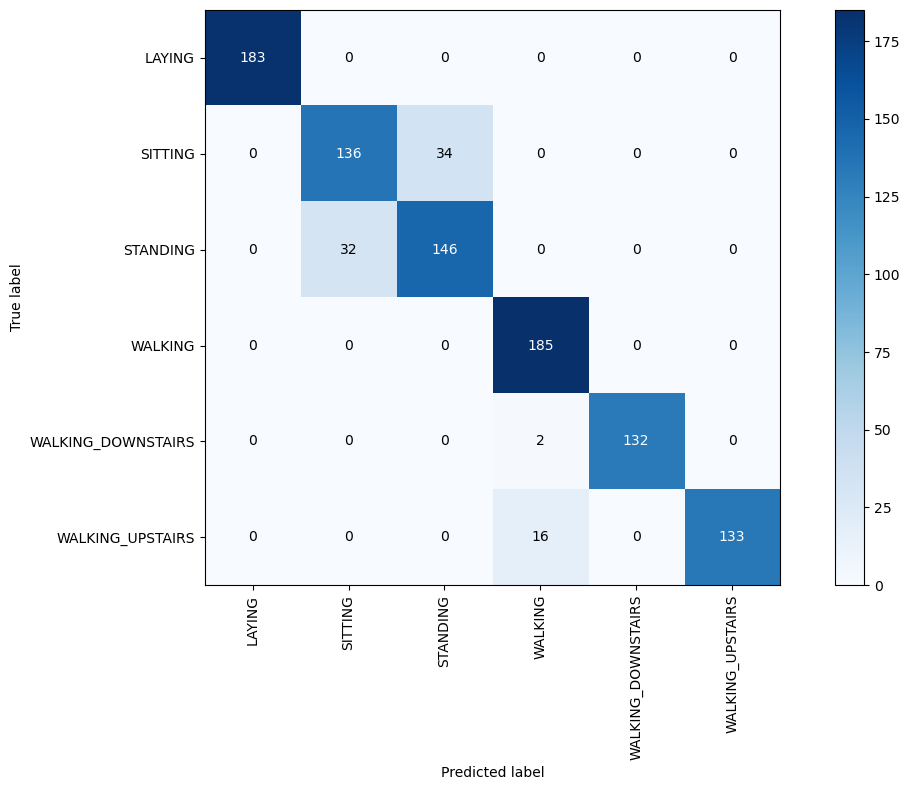

In [132]:
cm = confusion_matrix(ytest.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))